<a href="https://colab.research.google.com/github/jwjang1/GS25_vs_7-11/blob/main/GS25%EC%99%80_%EC%84%B8%EB%B8%90%EC%9D%BC%EB%A0%88%EB%B8%90_%EC%84%9C%EC%9A%B8_%EC%9E%85%EC%A7%80_%EB%B9%84%EA%B5%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터: 소상공인시장진흥공단 상가업소정보   
데이터 출처: https://www.data.go.kr/dataset/15012005/fileData.do

In [76]:
import pandas as pd
import numpy as np
from plotnine import *
import seaborn as sns
# 지도 시각화를 위해
import folium

In [77]:
from IPython.core.display import display, HTML
display(HTML("<script>IPython.notebook.execute_cell_range(0, 0)</script>"))

In [78]:
import matplotlib.pyplot as plt

# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic')

In [79]:
with open('/content/sample_data/seoul.csv', 'r', encoding='utf-8') as infile, open('cleaned_seoul.csv', 'w', encoding='utf-8') as outfile:
    for i, line in enumerate(infile):
        if i != 11532:  # Skip problematic row
            outfile.write(line)

shop_2025 = pd.read_csv('cleaned_seoul.csv', encoding='utf-8')

In [80]:
# Try 'utf-8' encoding first, as it is more universal

try:
    shop_2024 = pd.read_csv('/content/sample_data/cleaned_seoul.csv', encoding='utf-8')
except UnicodeDecodeError:
# If 'utf-8' fails, try 'cp949' which is another common Korean encoding
# try:
#     shop_2024 = pd.read_csv('/content/sample_data/seoul.csv', encoding='cp949')
# except UnicodeDecodeError:
        # If both fail, try 'latin-1'
# try:
#     shop_2024 = pd.read_csv('/content/sample_data/seoul.csv', encoding='latin-1')
# except UnicodeDecodeError:
            # If all else fails, you might need to investigate the file encoding.
            # Check for special characters or try using the 'chardet' library to detect the encoding
            # install chardet using !pip install chardet
            #import chardet
            #with open('/content/sample_data/seoul.csv', 'rb') as f:
            #    result = chardet.detect(f.read())
            #shop_2024 = pd.read_csv('/content/sample_data/seoul.csv', encoding=result['encoding'])

            print("Error: Could not determine the file encoding. Please check the file or try a different encoding.")


shop_2024.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,MA0101202210A0093845,이상한스냅,NaN,M1,과학·기술,M113,사진 촬영,M11301,사진촬영업,M73303,...,1147010300100090004000001,백송주택,서울특별시 양천구 월정로 283,158822,7902,NaN,NaN,NaN,126.828832,37.542117
1,MA010120220805430767,토끼정,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1150010500107740012000001,마커스빌딩,서울특별시 강서구 마곡동로 55,157805,7802,NaN,2,NaN,126.833022,37.560053
2,MA010120220805430797,가배차,NaN,I2,음식,I201,한식,I20101,백반/한정식,I56111,...,1171010400101430002012823,사이언스빌딩,서울특별시 송파구 가락로 209,138852,5663,NaN,1,NaN,127.116136,37.507170
3,MA010120220805430812,비에이치씨항동점,NaN,I2,음식,I210,기타 간이,I21006,치킨,I56193,...,1153011200101000005000001,항동중흥에스클래스베르데카운티,서울특별시 구로구 연동로 233,152140,8362,NaN,1,NaN,126.820686,37.481640
4,MA010120220805430834,무지개삼성약국,NaN,G2,소매,G215,의약·화장품 소매,G21501,약국,G47811,...,1168011400106840005002734,대훈빌딩,서울특별시 강남구 일원로 45,135516,6343,NaN,NaN,NaN,127.081499,37.489893


In [81]:
!ls

cleaned_seoul.csv  sample_data	seoul.csv


In [82]:
shop_2024.shape

(11531, 39)

In [83]:
convenience_store = shop_2024[shop_2024['상권업종소분류명'].str.contains('편의점')]
convenience_store.shape

(220, 39)

In [84]:
convenience_store.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [85]:
# 상호명으로 봤을 때 편의점이 216
convenience_store['상호명'].unique().shape

(216,)

In [86]:
convenience_store['상호명'].value_counts()
#하지만 상호명표기가 지점마다 다르기때문에 216은 유의미한 숫자가 아님.

,count
상호명,
세븐일레븐,2
씨유묵동,2
GS25,2
지에스25,2
세븐일레븐구로드림,1
...,...
씨유상수팜팜점,1
지에스25광운,1
비지에프리테일강남,1


In [87]:
convenience_store

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
43,MA010120220805434221,세븐일레븐구로드림,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1153010200101970010022767,이앤씨벤처드림타워2차,서울특별시 구로구 디지털로33길 55,152719,8376,NaN,NaN,NaN,126.893029,37.486746
247,MA010120220805438625,씨유공릉철길공원점,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1135010300103510012014137,성도교회,서울특별시 노원구 공릉로37길 17,139802,1837,NaN,NaN,NaN,127.078410,37.623315
359,MA010120220805449645,세븐일레븐LDCC점,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1154510100105330002000001,롯데정보통신,서울특별시 금천구 가산디지털2로 179,153705,8500,NaN,1,NaN,126.876299,37.483452
436,MA010120220805442576,이마트24신촌,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1141011200101040075023955,NaN,서울특별시 서대문구 연세로2길 75,120809,3778,NaN,1,NaN,126.940907,37.557079
459,MA010120220805445982,세븐녹번중앙점,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1138010200101550022043541,NaN,서울특별시 은평구 서오릉로 15,122834,3459,NaN,1,NaN,126.925903,37.602518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11211,MA010120220806443022,세븐마포노고산점,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1144011000100490022007307,NaN,서울특별시 마포구 신촌로14길 5,121807,4057,NaN,1,NaN,126.933966,37.555656
11232,MA010120220806432457,아이스앤스낵창고,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47216,...,1174010200104860000018100,아남아파트,서울특별시 강동구 양재대로 1706,134752,5230,NaN,1,NaN,127.146277,37.557959
11266,MA010120220806429552,지에스25삼성메디슨점,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1168010600110000010012129,다온빌딩,서울특별시 강남구 테헤란로104길 31,135502,6174,NaN,1,NaN,127.065757,37.507250
11494,MA010120220806435369,지에스25연남게스트점,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1144012400102390046000001,제이에스빌,서울특별시 마포구 성미산로 158,121865,3983,NaN,1,NaN,126.923768,37.564394


In [88]:
convenience_store[convenience_store['상호명'].str.contains('세븐일레븐')]
#convenience_store[convenience_store['상호명'] == '세븐일레븐']

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
43,MA010120220805434221,세븐일레븐구로드림,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1153010200101970010022767,이앤씨벤처드림타워2차,서울특별시 구로구 디지털로33길 55,152719,8376,NaN,NaN,NaN,126.893029,37.486746
359,MA010120220805449645,세븐일레븐LDCC점,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1154510100105330002000001,롯데정보통신,서울특별시 금천구 가산디지털2로 179,153705,8500,NaN,1,NaN,126.876299,37.483452
873,MA010120220805467466,세븐일레븐대치역점,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1168010600105070002000001,대치퍼스트빌딩,서울특별시 강남구 삼성로 155,135836,6291,NaN,1,NaN,127.062903,37.493928
2744,MA010120220805534974,세븐일레븐,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1141012000103350001005798,NaN,서울특별시 서대문구 모래내로 241-59,120806,3693,NaN,1,NaN,126.924484,37.575978
3715,MA010120220805640502,세븐일레븐종암고대점,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1129013500100230059022811,NaN,서울특별시 성북구 북악산로 1059,136860,2811,NaN,1,NaN,127.035611,37.592635
4882,MA010120220805799740,세븐일레븐은석점,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1168010100107290001024013,NaN,서울특별시 강남구 언주로79길 33,135921,6225,NaN,NaN,NaN,127.041492,37.498676
5868,MA010120220805899537,세븐일레븐한남,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1117013100106570045005956,NaN,서울특별시 용산구 대사관로19길 7,140887,4401,NaN,1,NaN,127.003624,37.533828
6170,MA010120220805896814,일원미래점세븐일레븐,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1168011400106620001002306,NaN,서울특별시 강남구 일원로5길 58,135945,6342,NaN,1,NaN,127.084841,37.492190
6648,MA010120220805953015,세븐일레븐대치공원점,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1168010600109320000026879,NaN,서울특별시 강남구 삼성로63길 21,135998,6209,NaN,1,NaN,127.058390,37.499434
6661,MA010120220805960759,세븐일레븐논현건설회관점,NaN,G2,소매,G204,종합 소매,G20405,편의점,G47122,...,1168010800100830020006040,NaN,서울특별시 강남구 학동로37길 23,135818,6053,NaN,1,NaN,127.034280,37.516837


In [89]:
convenience_store.loc[convenience_store['상호명'].str.contains('세븐일레븐'), '상호명'].unique()

array(['세븐일레븐구로드림', '세븐일레븐LDCC점', '세븐일레븐대치역점', '세븐일레븐', '세븐일레븐종암고대점',
       '세븐일레븐은석점', '세븐일레븐한남', '일원미래점세븐일레븐', '세븐일레븐대치공원점', '세븐일레븐논현건설회관점',
       '세븐일레븐가산한신아이티점', '세븐일레븐구로초원점', '세븐일레븐봉천', '세븐일레븐도봉노해공원점',
       '세븐일레븐장위꿈의숲점', '세븐일레븐삼전으뜸점', '세븐일레븐시그니처', '세븐일레븐금천벚꽃점',
       '세븐일레븐군자역점', '세븐일레븐서초내곡점', '세븐일레븐서울여고점', '세븐일레븐천호타운점',
       '세븐일레븐월곡타운점', '세븐일레븐상암한샘점', '세븐일레븐성수위즈베라점', '세븐일레븐서대문',
       '세븐일레븐마포보석점'], dtype=object)

In [90]:
convenience_store['시도명'].isnull().sum()

0

In [91]:
convenience_store['시도명'].unique()

array(['서울특별시'], dtype=object)

In [92]:
# 서울 데이터만 포함
convenience_store['시도명'].value_counts()

,count
시도명,
서울특별시,220


In [93]:
convenience_store['시군구명'].unique()

array(['구로구', '노원구', '금천구', '서대문구', '은평구', '마포구', '관악구', '영등포구', '서초구',
       '중구', '용산구', '강남구', '송파구', '도봉구', '중랑구', '동작구', '동대문구', '종로구',
       '강북구', '강서구', '강동구', '성동구', '광진구', '성북구', '양천구'], dtype=object)

In [94]:
convenience_store['상권업종중분류명'].value_counts()

,count
상권업종중분류명,
종합 소매,220


In [95]:
(ggplot(shop_2025[:1000])
  + aes(x='경도', y='위도')
  + geom_point()
  + theme(text=element_text(family='NanumBarunGothic'))
 )

'''
shop_2018[:1000].plot.scatter(x="경도", y="위도", grid="True")
'''

'\nshop_2018[:1000].plot.scatter(x="경도", y="위도", grid="True")\n'

In [96]:
df_seoul = shop_2025.loc[shop_2025['시도명'].str.startswith('서울')].copy()
df_seoul.shape

(11531, 39)

In [97]:
df_seoul.isnull().sum()

,0
상가업소번호,0
상호명,0
지점명,11531
상권업종대분류코드,0
상권업종대분류명,0
상권업종중분류코드,0
상권업종중분류명,0
상권업종소분류코드,0
상권업종소분류명,0
표준산업분류코드,0


In [98]:
df_seoul['상권업종대분류명'].value_counts()

,count
상권업종대분류명,
음식,3218
과학·기술,2266
소매,2262
수리·개인,1123
교육,776
부동산,611
예술·스포츠,489
시설관리·임대,487
보건의료,180


In [99]:
df_seoul.describe(include=object) # Replace np.object with object

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,...,시군구명,행정동명,법정동명,대지구분명,지번주소,도로명,건물관리번호,건물명,도로명주소,층정보
count,11531,11531,11531,11531,11531,11531,11531,11531,11531,11531,...,11531,11531,11531,11531,11531,11531,11531,5599,11531,8615
unique,11531,11222,10,10,75,75,233,233,251,251,...,25,424,430,2,9459,3957,9383,3452,9381,49
top,MA0101202210A0093845,컴퓨터수리,I2,음식,I201,한식,L10203,부동산 중개/대리업,I56111,한식 일반 음식점업,...,강남구,역삼1동,서초동,대지,서울특별시 송파구 문정동 634,서울특별시 강남구 테헤란로,1171010800105600000000001,가든파이브라이프,서울특별시 송파구 충민로 66,1
freq,1,10,3218,3218,1036,1036,611,611,710,710,...,1347,296,428,11522,25,96,30,30,30,4584


In [100]:
df_seoul[['위도', '경도']].describe(include=np.number)

,위도,경도
count,11531.000000,11531.000000
mean,37.539774,126.992319
std,0.047187,0.083144
min,37.434978,126.796353
25%,37.501361,126.921029
50%,37.536558,127.010600
75%,37.568004,127.053940
max,37.690188,127.182169


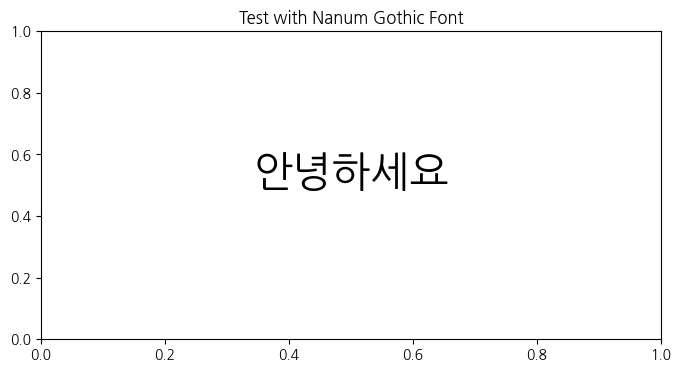

In [101]:
#setting up the font
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import os

# Get the path to the NanumGothic font (you should specify the exact correct path here)
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# Verify the font path exists
if os.path.exists(font_path):
    # Add the font file
    fm.fontManager.addfont(font_path)


    # Set the font for Matplotlib
    plt.rcParams['font.family'] = 'NanumGothic'
    plt.rcParams['axes.unicode_minus'] = False  # Fix the minus symbol issue for Korean

    # Test the font by plotting
    plt.figure(figsize=(8, 4))
    plt.text(0.5, 0.5, '안녕하세요', fontsize=30, ha='center')
    plt.title('Test with Nanum Gothic Font')
    plt.show()
else:
    print("Font file not found. Please check the path.")


<Axes: xlabel='count', ylabel='상권업종대분류명'>

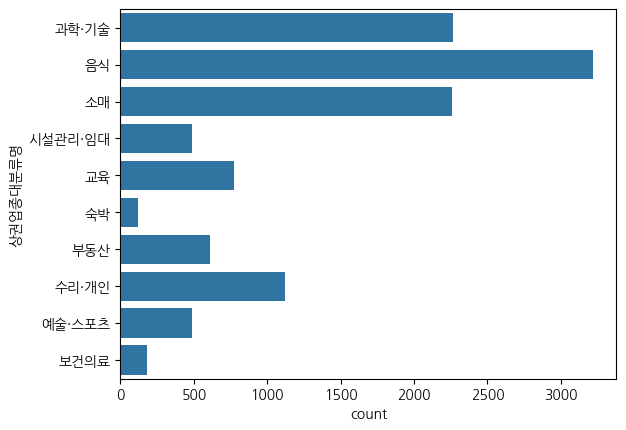

In [102]:
'''
(ggplot(df_seoul)
 + aes('상권업종대분류명')
 + geom_bar(fill='#8181F7')
 + ggtitle('상권업종대분류명')
 + coord_flip() #가로로 보기
 + theme(text=element_text(family='NanumBarunGothic')
)
'''
'''
(ggplot(df_seoul)
 + aes('상권업종대분류명')
 + geom_bar(fill='#8181F7')
 + ggtitle('상권업종대분류명')
 + theme(text=element_text(family='NanumBarunGothic'),
        axis_text_x=element_text(rotation=60))
)
'''

sns.countplot(data=df_seoul, y="상권업종대분류명")

In [103]:
df_food = df_seoul.loc[df_seoul['상권업종대분류명'].str.contains('음식')]
df_food.shape

(3218, 39)

<Axes: xlabel='count', ylabel='상권업종중분류명'>

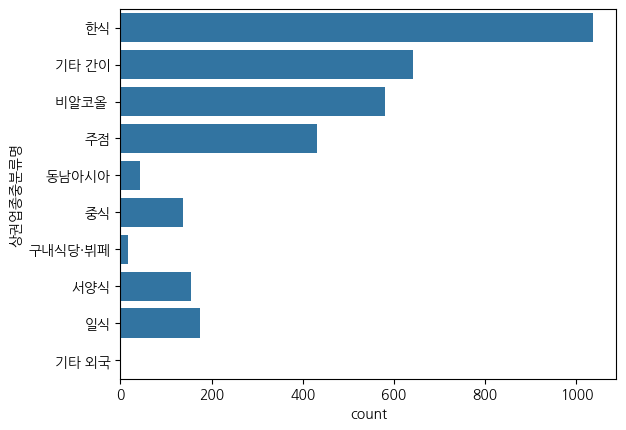

In [104]:
'''
# (ggplot(df_food)
#  + aes('상권업종중분류명')
#  + geom_bar(fill='#817FEE')
#  + ggtitle('상권업종중분류명')
#  + coord_flip()
#  + theme(text=element_text(family='NanumBarunGothic')
# )
'''
sns.countplot(data=df_food, y="상권업종중분류명")

세븐일레븐과 GS25 입지분석

In [108]:
df_711 = df_seoul[df_seoul['상호명'].str.contains('세븐일레븐|지에스25|GS25')].copy()
df_711.shape

(91, 39)

In [109]:
df_711.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [110]:
df_711 = df_711[['상호명', '지점명', '상권업종대분류명', '상권업종중분류명',
               '지번주소', '도로명주소',  '위도', '경도', '시군구명', '행정동명']].copy()
df_711.columns

Index(['상호명', '지점명', '상권업종대분류명', '상권업종중분류명', '지번주소', '도로명주소', '위도', '경도',
       '시군구명', '행정동명'],
      dtype='object')

In [111]:
df_711.head()

,상호명,지점명,상권업종대분류명,상권업종중분류명,지번주소,도로명주소,위도,경도,시군구명,행정동명
43,세븐일레븐구로드림,NaN,소매,종합 소매,서울특별시 구로구 구로동 197-10,서울특별시 구로구 디지털로33길 55,37.486746,126.893029,구로구,구로3동
359,세븐일레븐LDCC점,NaN,소매,종합 소매,서울특별시 금천구 가산동 533-2,서울특별시 금천구 가산디지털2로 179,37.483452,126.876299,금천구,가산동
504,지에스25상계1단지점,NaN,소매,종합 소매,서울특별시 노원구 상계동 767-5,서울특별시 노원구 덕릉로 459-37,37.646907,127.059398,노원구,상계6.7동
693,GS25여의도역,NaN,소매,종합 소매,서울특별시 영등포구 여의도동 35-5,서울특별시 영등포구 여의나루로 42,37.521389,126.924974,영등포구,여의동
735,지에스25방배브라운,NaN,소매,종합 소매,서울특별시 서초구 방배동 898-6,서울특별시 서초구 방배로 146,37.486922,126.994399,서초구,방배1동


In [112]:
df_711['상호명'].value_counts()

,count
상호명,
지에스25,2
GS25,2
세븐일레븐,2
세븐일레븐구로드림,1
지에스25금천패션,1
...,...
지에스25독산초교점,1
세븐일레븐한남,1
GS25신정신서점,1


In [113]:
# 브랜드명이라는 컬럼을 새로 만들어줍니다.
df_711['브랜드명'] = ''

In [114]:
df_711[['상호명', '브랜드명']].head()

,상호명,브랜드명
43,세븐일레븐구로드림,
359,세븐일레븐LDCC점,
504,지에스25상계1단지점,
693,GS25여의도역,
735,지에스25방배브라운,


In [115]:
df_711.loc[df_711['상호명'].str.contains('세븐일레븐'), '브랜드명'] = '세븐일레븐'
df_711.loc[df_711['상호명'].str.contains('GS25|지에스25'), '브랜드명'] = 'GS25'

In [116]:
df_711[['상호명', '브랜드명']].head()

,상호명,브랜드명
43,세븐일레븐구로드림,세븐일레븐
359,세븐일레븐LDCC점,세븐일레븐
504,지에스25상계1단지점,GS25
693,GS25여의도역,GS25
735,지에스25방배브라운,GS25


In [117]:
df_711_group_count = df_711['브랜드명'].value_counts()
df_711_group_count

,count
브랜드명,
GS25,63
세븐일레븐,28


In [118]:
df_711_ratio = df_711_group_count[0]/df_711_group_count[1]
print('제공된 데이터로 봤을 때 서울에는 세븐일레븐보다 GS25의 매장이 {0:.2f}배가량 많습니다.'.format(df_711_ratio))

제공된 데이터로 봤을 때 서울에는 세븐일레븐보다 GS25의 매장이 2.25배가량 많습니다.


<ipython-input-118-bfdd994e2ff3>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


In [119]:
df_711.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91 entries, 43 to 11494
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   상호명       91 non-null     object 
 1   지점명       0 non-null      float64
 2   상권업종대분류명  91 non-null     object 
 3   상권업종중분류명  91 non-null     object 
 4   지번주소      91 non-null     object 
 5   도로명주소     91 non-null     object 
 6   위도        91 non-null     float64
 7   경도        91 non-null     float64
 8   시군구명      91 non-null     object 
 9   행정동명      91 non-null     object 
 10  브랜드명      91 non-null     object 
dtypes: float64(3), object(8)
memory usage: 8.5+ KB


In [120]:
df_711['위도'] = df_711['위도'].astype(float)
df_711['경도'] = df_711['경도'].astype(float)

<Axes: xlabel='경도', ylabel='위도'>

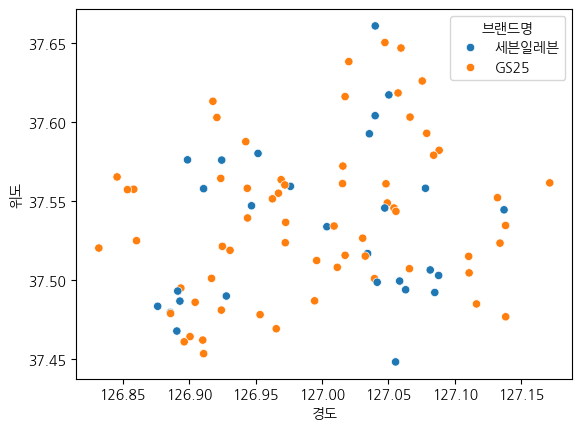

In [121]:
'''
# 같은 그래프를 여러가지 시각화 툴로 그려봅니다. plotnine을 사용해서 ggplot으로 그려본 사례
# (ggplot(df_31)
#  + aes(x='경도', y='위도', color='브랜드명')
#  + geom_point()
#  + theme(text=element_text(family='NanumBarunGothic'))
# )
'''
'''
# Pandas 로 scatter plot 그리기
df_31.plot.scatter(x='경도', y='위도')
'''

sns.scatterplot(data=df_711, x='경도', y='위도', hue="브랜드명")

In [122]:
geo_df = df_711.copy()


# 지도를 초기화 해줄 때 어디를 중심으로 보여줄지 설정
# 가져온 데이터프레임 안에 있는 데이터를 기준으로 출력할 수 있도록 위경도의 평균값 사용
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()], zoom_start=12)

for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정
    popup_name = geo_df.loc[n, '브랜드명'] + ' - ' + geo_df.loc[n, '도로명주소']
    # 브랜드명에 따라 아이콘 색상 지정
    if geo_df['브랜드명'][n] == '세븐일레븐' :
        icon_color = 'red'
    else:
        icon_color = 'blue'

    folium.Marker([geo_df.loc[n, '위도'], geo_df.loc[n, '경도']],
                  popup=popup_name,
                  icon=folium.Icon(color=icon_color)).add_to(map)

map

In [123]:
map = folium.Map(location=[geo_df['위도'].mean(), geo_df['경도'].mean()],
                zoom_start=12,
                tiles='Stamen Toner',
                # Add attribution for Stamen Toner tiles
                attr='&copy; <a href="http://www.openstreetmap.org/copyright">OpenStreetMap</a> &copy; <a href="http://stamen.com">Stamen Design</a>')
for n in geo_df.index:
    # 팝업에 들어갈 텍스트 지정
    popup_name = geo_df['브랜드명'][n] + ' - ' + geo_df['도로명주소'][n]
    # 브랜드명에 따라 아이콘 색상 지정
    if geo_df['브랜드명'][n] == '세븐일레븐' :
        icon_color = 'red'
    else:
        icon_color = 'blue'

    # folium.features.CircleMarker 오류가 날 경우 --> folium.vector_layer.CircleMarker
    folium.CircleMarker(
        location=[geo_df['위도'][n], geo_df['경도'][n]],
        radius=3,
        popup=popup_name,
        color= icon_color,
        fill=True,
        fill_color=icon_color
    ).add_to(map)


map